# I. Xem trước bộ dữ liệu

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from utils import algorithm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
data_path = "breast_cancer.csv"
raw = pd.read_csv(data_path)
raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
col = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']
raw.columns = col

# Hiển thị: Số hàng và kiểu của các features trong bảng
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Preprocessing

In [6]:
drop_cols = [col for col in ['id']] # Cột 'id' không có ý nghĩa trong quá trình học máy
target_col = 'diagnosis'
num_cols = [col for col in raw.columns if col not in drop_cols + [target_col]]
cat_cols = []

In [8]:
X = raw.drop(drop_cols + [target_col], axis=1)
y = raw[target_col].map({'M':1,'B':0})

df = pd.DataFrame(X, columns=num_cols, index=raw.index)

# gắn nhãn nếu có
if y is not None:
    df[target_col] = y.values

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


<Axes: >

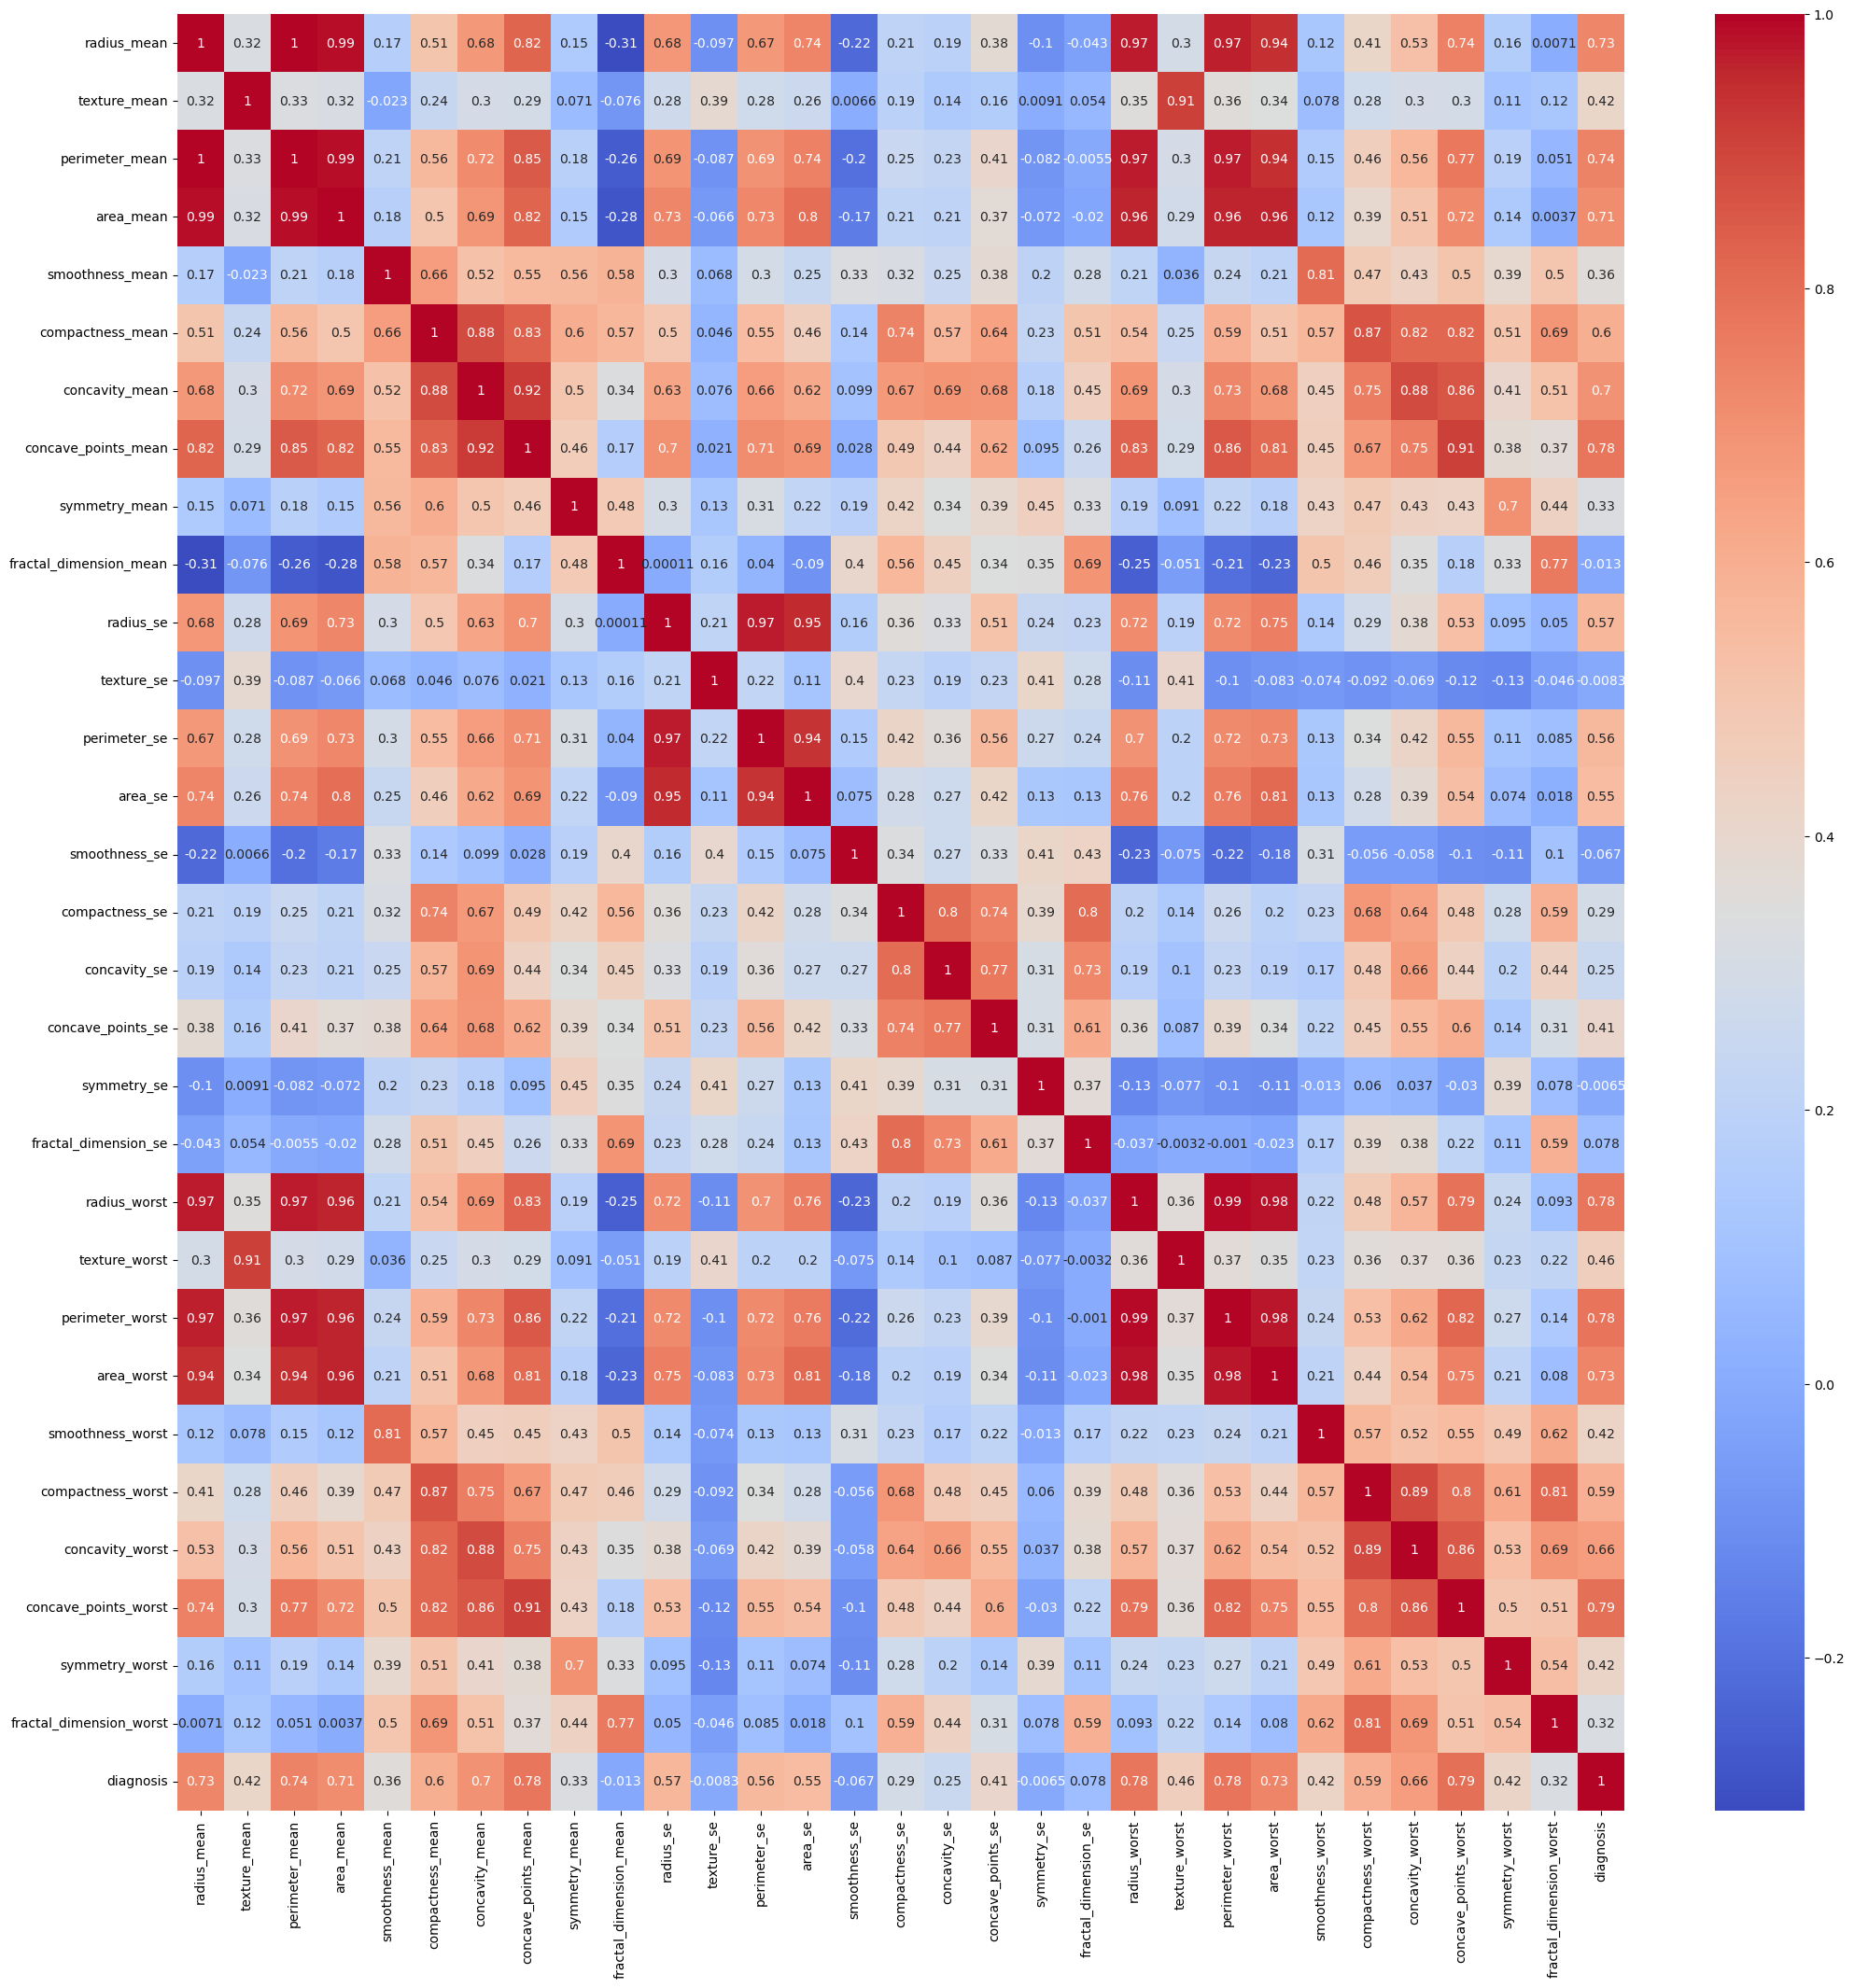

In [9]:
correlation = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

--- PHẦN 1: Lọc theo tương quan với 'diagnosis' ---
Tìm thấy 15 features có tương quan > 0.5 với 'diagnosis':
['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst']




<Figure size 1000x800 with 0 Axes>

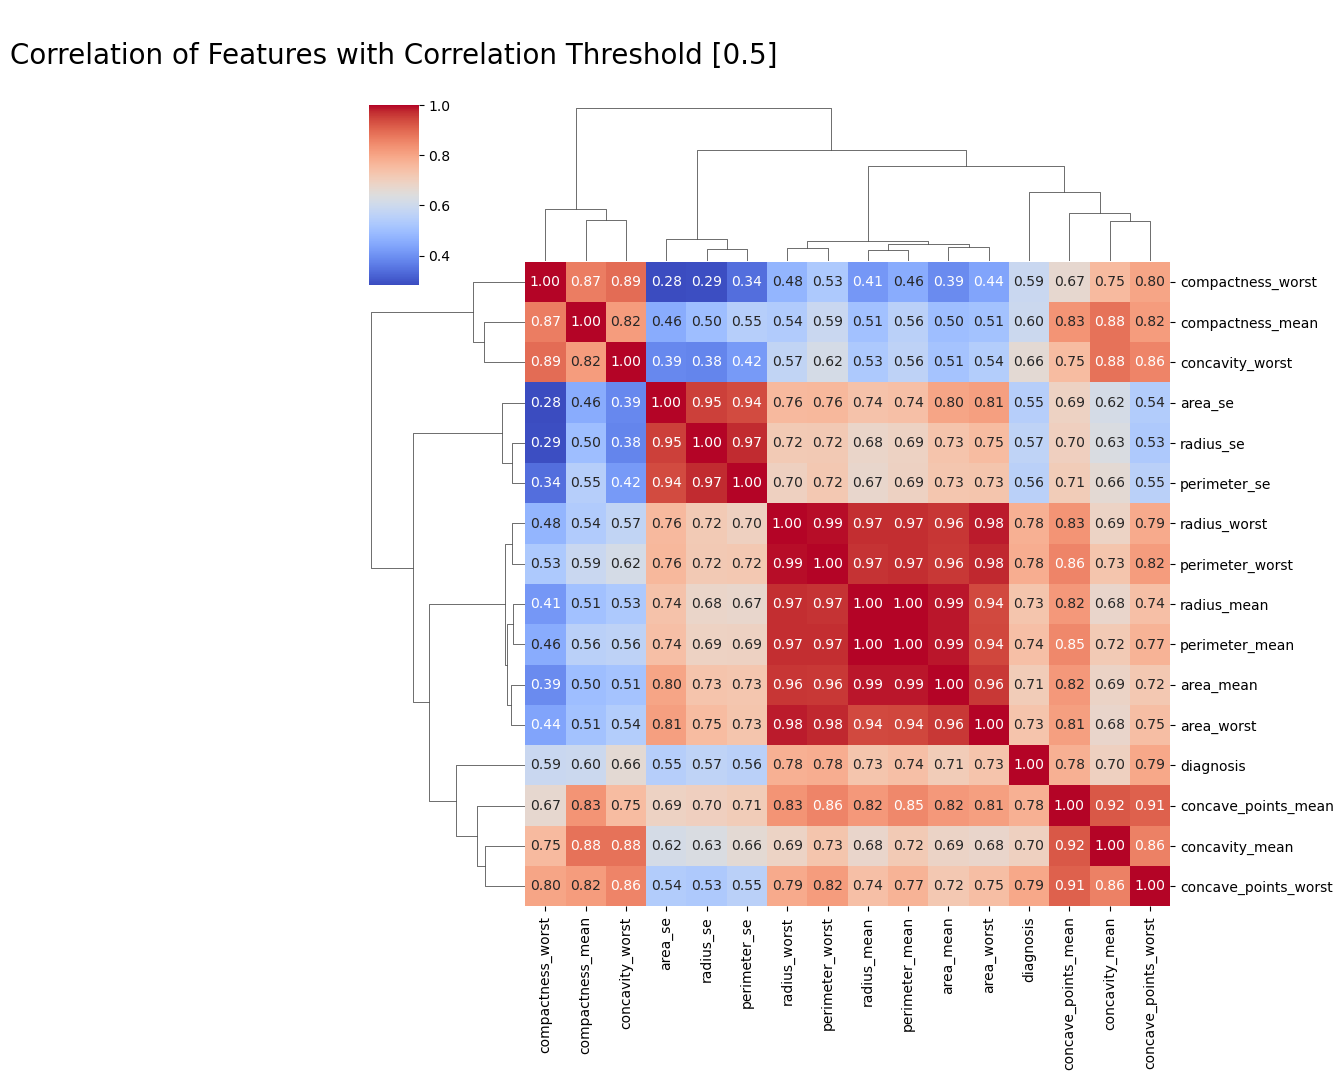

In [10]:
print("--- PHẦN 1: Lọc theo tương quan với 'diagnosis' ---")
threshold = 0.5
target_corr = correlation['diagnosis']
filter = np.abs(correlation["diagnosis"] > threshold)
features_step_1 = target_corr[filter].index.tolist()
if 'diagnosis' in features_step_1:
    features_step_1.remove('diagnosis')

print(f"Tìm thấy {len(features_step_1)} features có tương quan > {threshold} với 'diagnosis':")
print(features_step_1)
print("\n")

correlation_features = correlation.columns[filter].tolist()
plt.figure(figsize=(10,8))
sns.clustermap(df[correlation_features].corr(), annot = True, fmt = ".2f", cmap='coolwarm')
plt.title("\nCorrelation of Features with Correlation Threshold [0.5]\n",fontsize=20)
plt.show()

In [11]:
threshold_multicollinearity = 0.9
corr_step1 = df[features_step_1].corr().abs()
features_to_drop = set()
features_to_keep = list(features_step_1)

# Lặp qua ma trận tam giác trên (upper triangle)
for i in range(len(corr_step1.columns)):
    for j in range(i + 1, len(corr_step1.columns)): 
        col_i = corr_step1.columns[i]
        col_j = corr_step1.columns[j]        
            # Nếu 2 feature này tương quan cao VÀ chưa có feature nào bị drop
        if (corr_step1.loc[col_i, col_j] > threshold_multicollinearity) and (col_i not in features_to_drop) and (col_j not in features_to_drop):
                
                # So sánh xem feature nào có TƯƠNG QUAN VỚI 'diagnosis' YẾU HƠN
                # Chúng ta sẽ DROP feature yếu hơn
                
            corr_with_target_i = target_corr[col_i] # Lấy từ `target_corr` đã tính ở trên
            corr_with_target_j = target_corr[col_j]
                
            if corr_with_target_i < corr_with_target_j:
                features_to_drop.add(col_i)
                print(f"Phát hiện cặp tương quan cao (> {threshold_multicollinearity}): '{col_i}' và '{col_j}'")
                print(f"  -> Quyết định: DROP '{col_i}' (corr với diagnosis: {corr_with_target_i:.2f} < {corr_with_target_j:.2f})")
            else:
                features_to_drop.add(col_j)
                print(f"Phát hiện cặp tương quan cao (> {threshold_multicollinearity}): '{col_i}' và '{col_j}'")
                print(f"  -> Quyết định: DROP '{col_j}' (corr với diagnosis: {corr_with_target_j:.2f} <= {corr_with_target_i:.2f})")

    # Tạo danh sách features cuối cùng
final_features = [f for f in features_step_1 if f not in features_to_drop]

print("\n--- KẾT QUẢ ---")
print(f"Các features đã bị loại bỏ do đa cộng tuyến: {list(features_to_drop)}")
print(f"Danh sách features CUỐI CÙNG ({len(final_features)} features) để huấn luyện mô hình:")
print(final_features)


Phát hiện cặp tương quan cao (> 0.9): 'radius_mean' và 'perimeter_mean'
  -> Quyết định: DROP 'radius_mean' (corr với diagnosis: 0.73 < 0.74)
Phát hiện cặp tương quan cao (> 0.9): 'perimeter_mean' và 'area_mean'
  -> Quyết định: DROP 'area_mean' (corr với diagnosis: 0.71 <= 0.74)
Phát hiện cặp tương quan cao (> 0.9): 'perimeter_mean' và 'radius_worst'
  -> Quyết định: DROP 'perimeter_mean' (corr với diagnosis: 0.74 < 0.78)
Phát hiện cặp tương quan cao (> 0.9): 'concavity_mean' và 'concave_points_mean'
  -> Quyết định: DROP 'concavity_mean' (corr với diagnosis: 0.70 < 0.78)
Phát hiện cặp tương quan cao (> 0.9): 'concave_points_mean' và 'concave_points_worst'
  -> Quyết định: DROP 'concave_points_mean' (corr với diagnosis: 0.78 < 0.79)
Phát hiện cặp tương quan cao (> 0.9): 'radius_se' và 'perimeter_se'
  -> Quyết định: DROP 'perimeter_se' (corr với diagnosis: 0.56 <= 0.57)
Phát hiện cặp tương quan cao (> 0.9): 'radius_se' và 'area_se'
  -> Quyết định: DROP 'area_se' (corr với diagnosis: 


Đang vẽ Clustermap cho các features CUỐI CÙNG (sau khi loại bỏ đa cộng tuyến)...


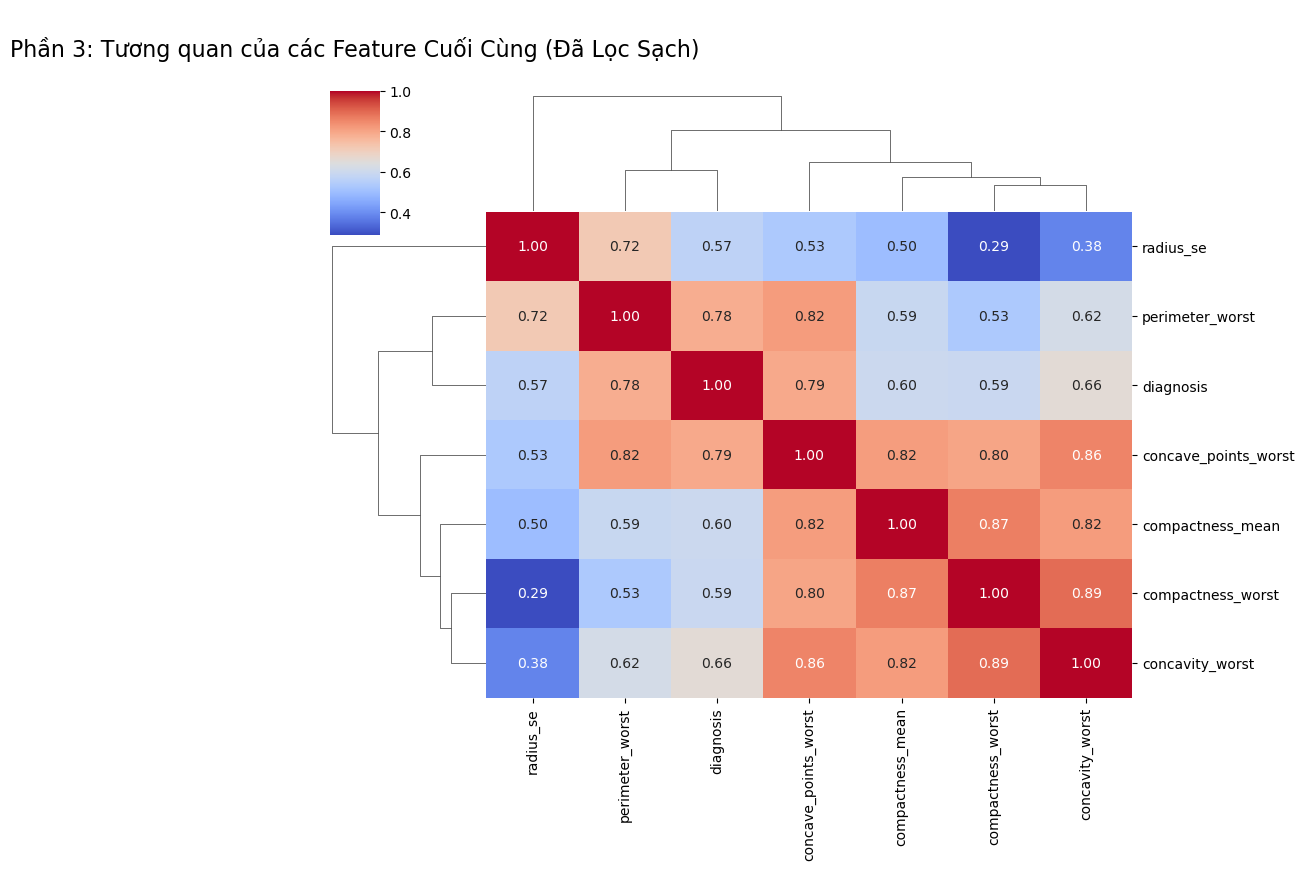

In [12]:
print("\nĐang vẽ Clustermap cho các features CUỐI CÙNG (sau khi loại bỏ đa cộng tuyến)...")
    
    # Thêm 'diagnosis' vào để xem tương quan
final_features_for_plot = final_features + ['diagnosis']
    
if len(final_features_for_plot) > 1:
    sns.clustermap(df[final_features_for_plot].corr(), annot=True, fmt=".2f", cmap='coolwarm', figsize=(10, 8))
    plt.title("\nPhần 3: Tương quan của các Feature Cuối Cùng (Đã Lọc Sạch)\n", fontsize=16)
    plt.show()
else:
    print("Không còn đủ feature để vẽ ma trận tương quan cuối cùng.")


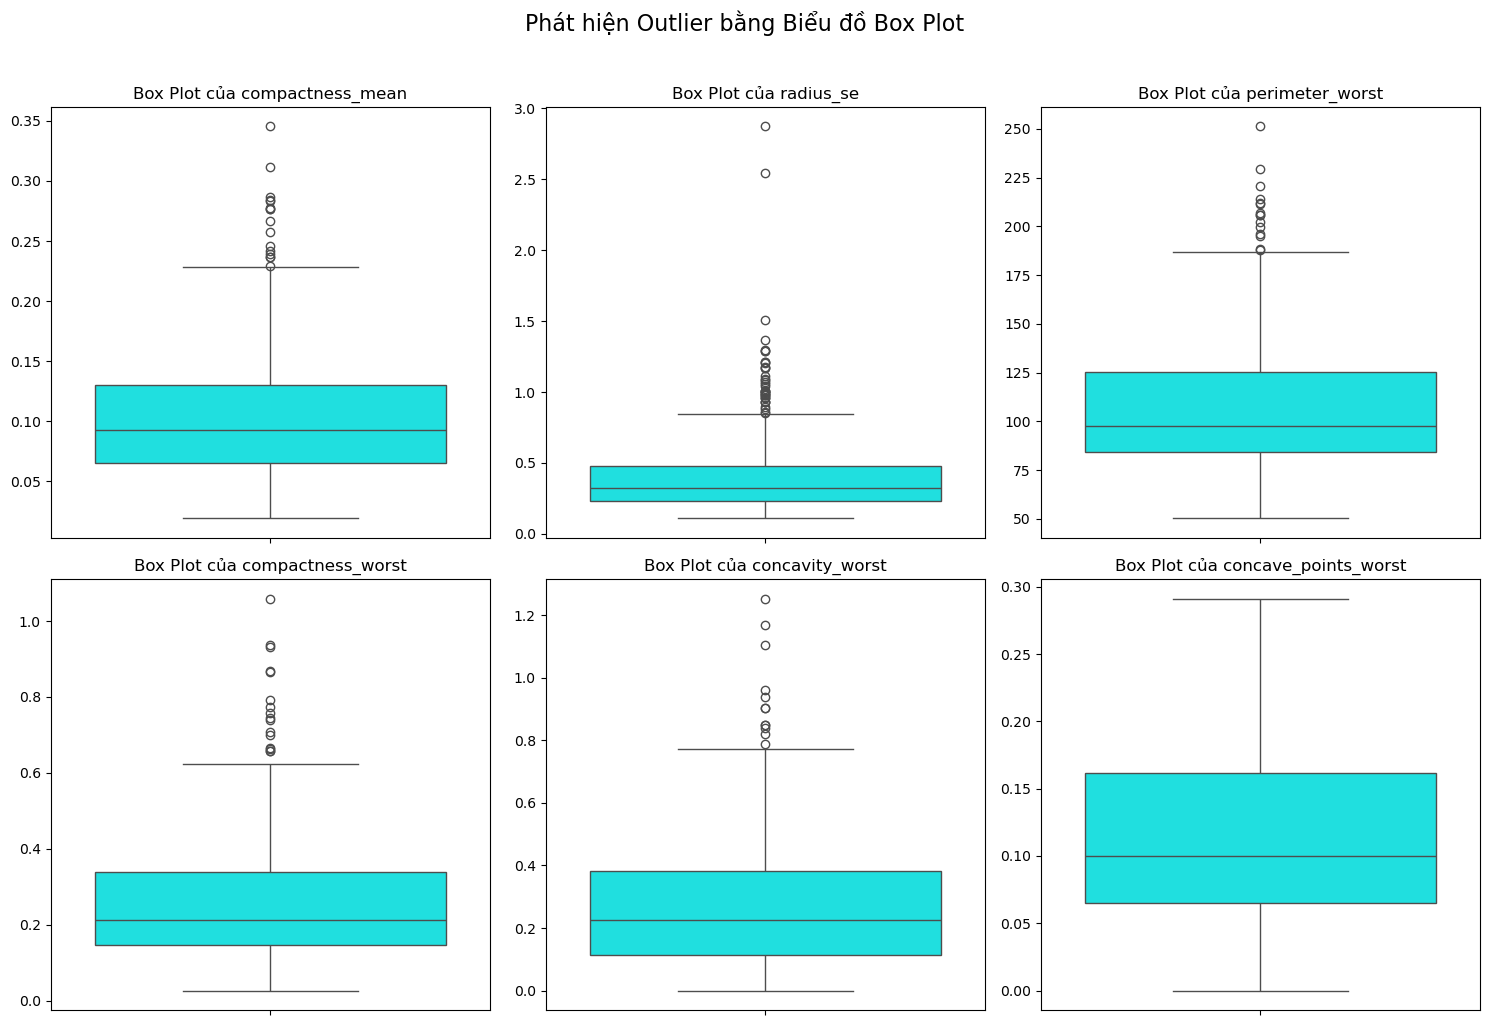

In [13]:
plt.figure(figsize = (15, 10))

for i, feature in enumerate(final_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[feature], color='cyan')
    plt.title(f'Box Plot của {feature}')
    plt.ylabel('')

plt.suptitle('Phát hiện Outlier bằng Biểu đồ Box Plot', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Số lượng hàng ban đầu: 569

Feature: compactness_mean
  - Ngưỡng dưới (1%): 0.0334
  - Ngưỡng trên (99%): 0.2772
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 6 outlier ở phía dưới.

Feature: radius_se
  - Ngưỡng dưới (1%): 0.1197
  - Ngưỡng trên (99%): 1.2913
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 6 outlier ở phía dưới.

Feature: perimeter_worst
  - Ngưỡng dưới (1%): 58.2704
  - Ngưỡng trên (99%): 208.3040
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 6 outlier ở phía dưới.

Feature: compactness_worst
  - Ngưỡng dưới (1%): 0.0501
  - Ngưỡng trên (99%): 0.7786
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 6 outlier ở phía dưới.

Feature: concavity_worst
  - Ngưỡng dưới (1%): 0.0000
  - Ngưỡng trên (99%): 0.9024
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 0 outlier ở phía dưới.

Feature: concave_points_worst
  - Ngưỡng dưới (1%): 0.0000
  - Ngưỡng trên (99%): 0.2692
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 0 outlier ở phía dưới.

Số lượng hàng sau khi Cap

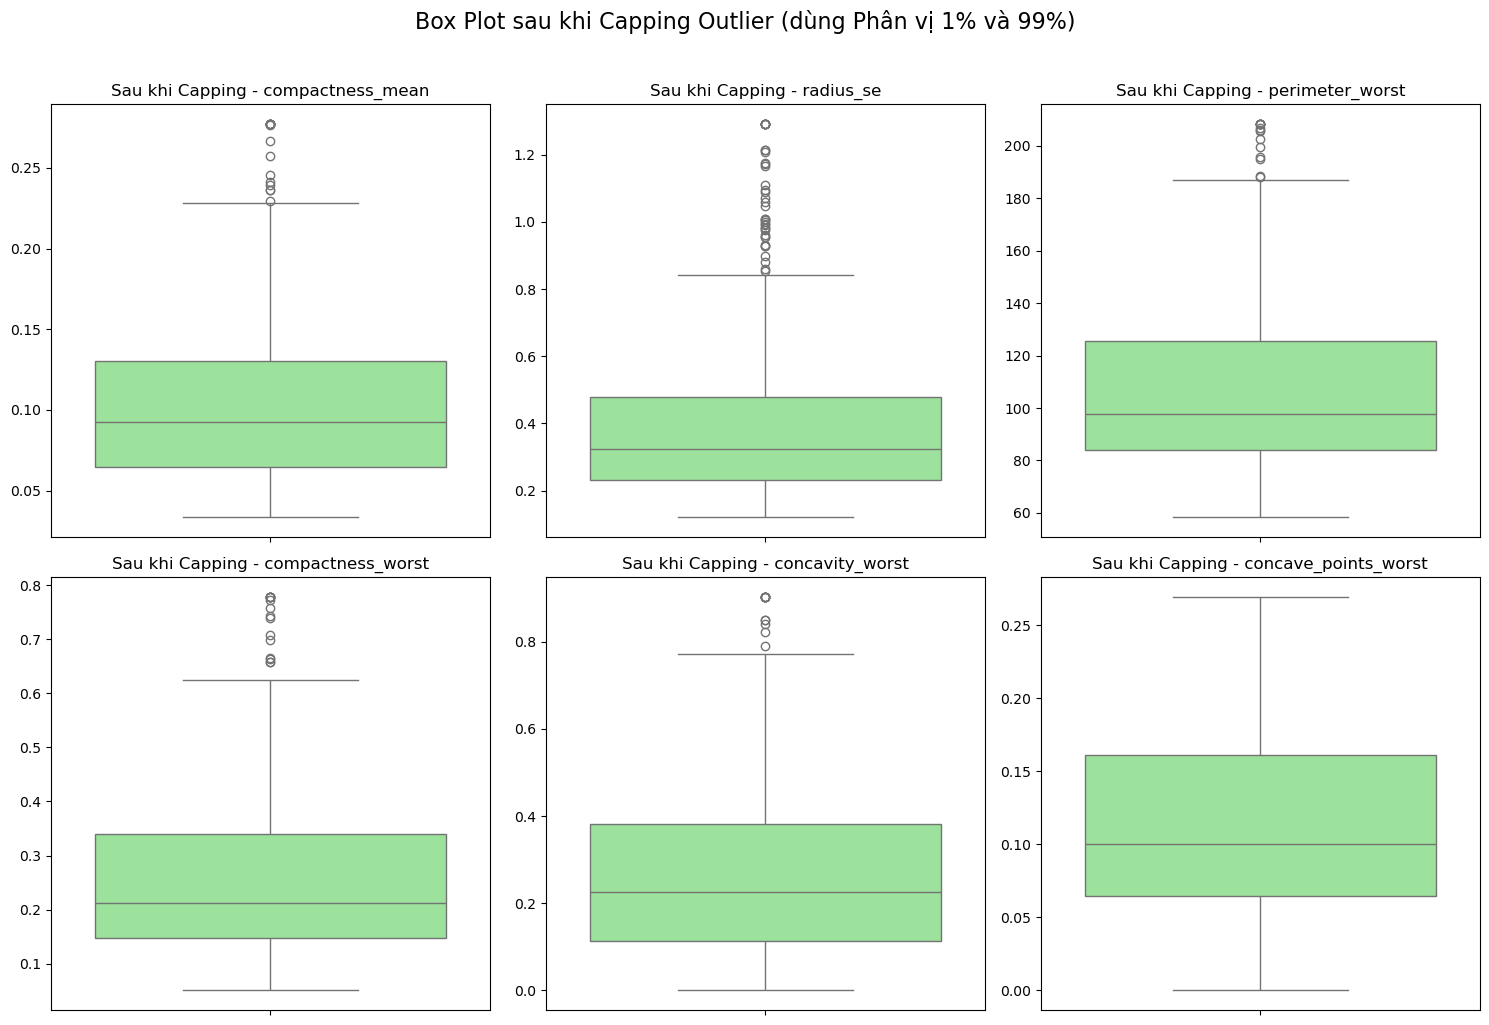

In [14]:
# Giả sử bạn có DataFrame 'df' và danh sách 'final_features'
# final_features = ['radius_se', 'perimeter_worst', 'concave_points_worst', 
#                   'compactness_mean', 'compactness_worst', 'concavity_worst']

print(f"Số lượng hàng ban đầu: {df.shape[0]}")

# Tạo một bản copy để xử lý
df_capped = df.copy()

# Lặp qua từng feature để 'cap' (giới hạn) outlier
for feature in final_features:
    # Tính toán ngưỡng trên (phân vị 99%)
    upper_limit = df_capped[feature].quantile(0.99)
    
    # Tính toán ngưỡng dưới (phân vị 1%)
    lower_limit = df_capped[feature].quantile(0.01)
    
    print(f"\nFeature: {feature}")
    print(f"  - Ngưỡng dưới (1%): {lower_limit:.4f}")
    print(f"  - Ngưỡng trên (99%): {upper_limit:.4f}")
    
    # Lấy số lượng outlier trước khi cap
    outliers_above = (df_capped[feature] > upper_limit).sum()
    outliers_below = (df_capped[feature] < lower_limit).sum()
    print(f"  - Tìm thấy {outliers_above} outlier ở phía trên.")
    print(f"  - Tìm thấy {outliers_below} outlier ở phía dưới.")

    # Thực hiện Capping
    # Thay thế tất cả giá trị > ngưỡng trên BẰNG ngưỡng trên
    df_capped[feature] = np.where(
        df_capped[feature] > upper_limit,  # Điều kiện
        upper_limit,                       # Giá trị nếu True
        df_capped[feature]                 # Giá trị nếu False
    )
    
    # Thay thế tất cả giá trị < ngưỡng dưới BẰNG ngưỡng dưới
    df_capped[feature] = np.where(
        df_capped[feature] < lower_limit,  # Điều kiện
        lower_limit,                       # Giá trị nếu True
        df_capped[feature]                 # Giá trị nếu False
    )

print(f"\nSố lượng hàng sau khi Capping: {df_capped.shape[0]} (không đổi)")

# --- Trực quan hóa để kiểm tra KẾT QUẢ ---
print("\nĐang vẽ Box Plot sau khi đã Capping...")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(final_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_capped[feature], color='lightgreen')
    plt.title(f'Sau khi Capping - {feature}', fontsize=12)
    plt.ylabel('')

plt.suptitle('Box Plot sau khi Capping Outlier (dùng Phân vị 1% và 99%)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Chia tap du lieu va chuan hoa 

In [25]:
final_features = ['radius_se', 'perimeter_worst', 'concave_points_worst', 'compactness_mean', 'compactness_worst', 'concavity_worst']

X = df_capped[final_features]
y = df_capped['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")

preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Đề phòng data test có null
    ('scaler', StandardScaler())                 # Bước Scaling RẤT QUAN TRỌNG
])

models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=1),
    'XGBoost': XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')
}

results = {}

for model_name, model in models.items():
    
    # Tạo Pipeline hoàn chỉnh: [Preprocessor] -> [Model]
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Huấn luyện trên X_train
    full_pipeline.fit(X_train, y_train)

    y_pred = full_pipeline.predict(X_test)
    
    # Đánh giá trên X_test
    accuracy = full_pipeline.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred)
    
    # Lưu kết quả
    results[model_name] = {
        'Accuracy': accuracy,
        'F1-score': f1
    }


# In kết quả cuối
results_df = pd.DataFrame(results).T
print("\n--- Kết quả Accuracy & F1 ---")
print(results_df.sort_values(by='F1-score', ascending=False))

Kích thước X_train: (398, 6)
Kích thước X_test: (171, 6)

--- Kết quả Accuracy & F1 ---
                     Accuracy  F1-score
Logistic Regression  0.947368  0.925620
SVM                  0.935673  0.909091
XGBoost              0.935673  0.909091
Random Forest        0.929825  0.898305
KNN                  0.918129  0.885246
Naive Bayes          0.906433  0.868852


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [13:54:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [30]:
# Các mô hình Ensemble để chạy thử
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier

print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")
print("--- Bắt đầu huấn luyện Ensemble Models ---")

preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Mô hình 1: Logistic Regression
clf1_lr = LogisticRegression(random_state=1)
pipe1 = Pipeline(steps=[('pre', preprocessor), ('model', clf1_lr)])

# Mô hình 2: Random Forest
clf2_rf = RandomForestClassifier(random_state=1)
pipe2 = Pipeline(steps=[('pre', preprocessor), ('model', clf2_rf)])

# Mô hình 3: SVM (cần probability=True cho 'soft' voting)
clf3_svm = SVC(probability=True, random_state=1)
pipe3 = Pipeline(steps=[('pre', preprocessor), ('model', clf3_svm)])

estimators_list = [
    ('logistic_reg', pipe1),
    ('random_forest', pipe2),
    ('svm', pipe3)
]


results = {}

# --- Thuật toán 1: VotingClassifier ---
# 'soft' voting (bỏ phiếu mềm) thường cho kết quả tốt hơn 'hard'
# Nó tính trung bình xác suất dự đoán từ các mô hình
print("\nĐang huấn luyện VotingClassifier...")
voting_clf = VotingClassifier(
    estimators=estimators_list,
    voting='soft'  # Dùng 'soft' vì tất cả base model đều hỗ trợ (có predict_proba)
)

voting_clf.fit(X_train, y_train)
accuracy_voting = voting_clf.score(X_test, y_test)
y_pred = voting_clf.predict(X_test)
f1 = f1_score(y_pred=y_pred, y_true=y_test)
results['Voting (Soft)'] = accuracy_voting
print(f"Accuracy của VotingClassifier: {accuracy_voting:.4f}")
print(f"F1 của VotingClassifier: {f1:.4f}")



# --- Thuật toán 2: StackingClassifier ---
# Stacking dùng một mô hình (final_estimator) để học cách
# kết hợp dự đoán từ các mô hình cơ sở.
print("\nĐang huấn luyện StackingClassifier...")
stacking_clf = StackingClassifier(
    estimators=estimators_list,
    final_estimator=LogisticRegression(), # Dùng LR làm mô hình meta
    cv=5 # Cross-validation cho các mô hình cơ sở
)

stacking_clf.fit(X_train, y_train)
accuracy_stacking = stacking_clf.score(X_test, y_test)
y_pred_stacking = stacking_clf.predict(X_test)
f1_stack = f1_score(y_pred=y_pred_stacking, y_true=y_test)
results['Stacking'] = accuracy_stacking
print(f"Accuracy của StackingClassifier: {accuracy_stacking:.4f}")
print(f"F1 của StackingClassifier: {f1_stack:.4f}")


# --- Thuật toán 3: AdaBoostClassifier (để so sánh) ---
# Đây là một thuật toán ensemble kiểu "boosting"
print("\nĐang huấn luyện AdaBoostClassifier...")
ada_model = AdaBoostClassifier(random_state=1)

# AdaBoost cũng cần pipeline riêng
pipe_ada = Pipeline(steps=[('pre', preprocessor), ('model', ada_model)])

pipe_ada.fit(X_train, y_train)
accuracy_ada = pipe_ada.score(X_test, y_test)
results['AdaBoost'] = accuracy_ada
print(f"Accuracy của AdaBoostClassifier: {accuracy_ada:.4f}")


# =========================================================================
# 4. TỔNG KẾT KẾT QUẢ
# =========================================================================
print("\n--- Kết quả Accuracy của các mô hình Ensemble ---")
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
print(results_df.sort_values(by='Accuracy', ascending=False))

Kích thước X_train: (398, 6)
Kích thước X_test: (171, 6)
--- Bắt đầu huấn luyện Ensemble Models ---

Đang huấn luyện VotingClassifier...
Accuracy của VotingClassifier: 0.9357
F1 của VotingClassifier: 0.9091

Đang huấn luyện StackingClassifier...
Accuracy của StackingClassifier: 0.9357
F1 của StackingClassifier: 0.9091

Đang huấn luyện AdaBoostClassifier...
Accuracy của AdaBoostClassifier: 0.9357

--- Kết quả Accuracy của các mô hình Ensemble ---
               Accuracy
Voting (Soft)  0.935673
Stacking       0.935673
AdaBoost       0.935673
